In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# ================== CONFIGURAÇÃO ==================
IMAGE_SIZE = (128, 128)  # Tamanho das imagens
BATCH_SIZE = 32
NUM_CLASSES = 5  # Altere para número de suas classes
EPOCHS = 50

In [3]:
# ================== PREPARAR DADOS DE IMAGENS ==================
def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))
    
    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                if image_file.endswith(('.jpg', '.jpeg', '.png')):
                    image_path = os.path.join(class_path, image_file)
                    try:
                        img = Image.open(image_path).convert('RGB')
                        img = img.resize(IMAGE_SIZE)
                        img_array = np.array(img) / 255.0  # Normalizar [0, 1]
                        images.append(img_array)
                        labels.append(class_idx)
                    except Exception as e:
                        print(f"Erro ao carregar {image_path}: {e}")
    
    return np.array(images), np.array(labels), class_names

In [4]:
# ================== MODELO PARA IMAGENS ==================
def create_image_mlp(input_shape, num_classes, hidden_units=64):
    model = Sequential([
        Flatten(input_shape=input_shape),  # Achata a imagem para MLP
        Dense(hidden_units, activation='relu'),
        Dense(hidden_units, activation='relu'), 
        Dense(hidden_units, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
# ================== PLOTAR GRÁFICOS ==================
def plot_training_history(history, hidden_units):
    plt.figure(figsize=(15, 5))
    
    # Gráfico de Acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title(f'Training and Validation Accuracy\n({hidden_units} units)', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Gráfico de Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title(f'Training and Validation Loss\n({hidden_units} units)', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Carregando imagens...
Carregadas 3210 imagens de 4 classes
Classes: ['classe1', 'classe2', 'classe3', 'classe4']

Testando com 32 unidades ocultas...


c:\Users\chena\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


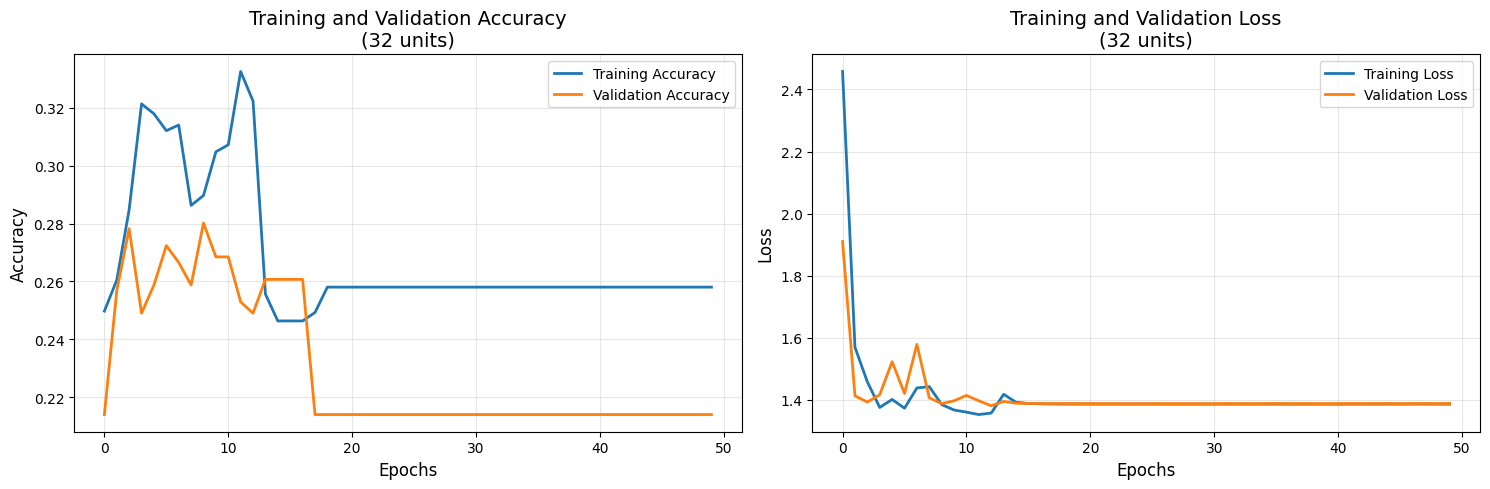

Acurácia validação: 0.2802

Testando com 64 unidades ocultas...


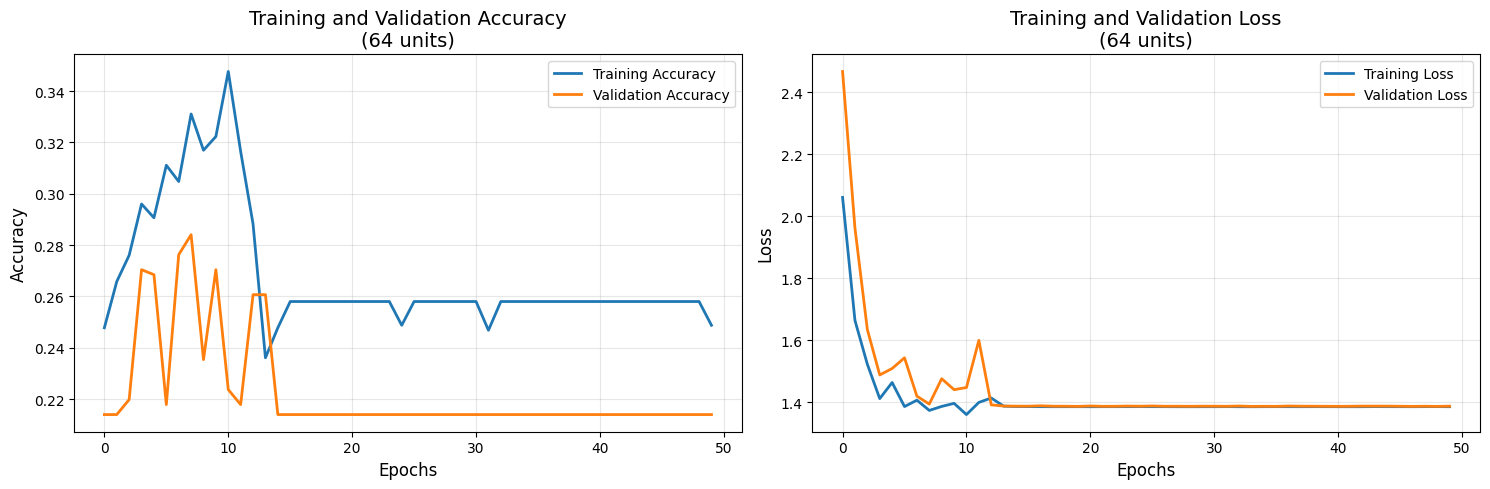

Acurácia validação: 0.2840

Testando com 128 unidades ocultas...


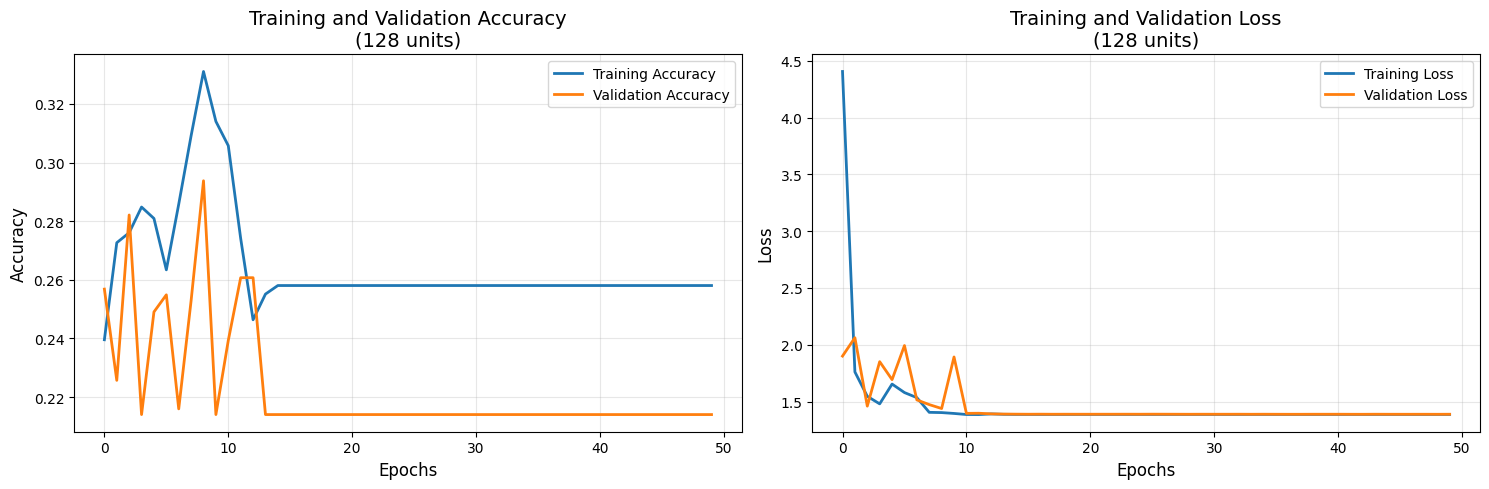

Acurácia validação: 0.2938

Testando com 256 unidades ocultas...


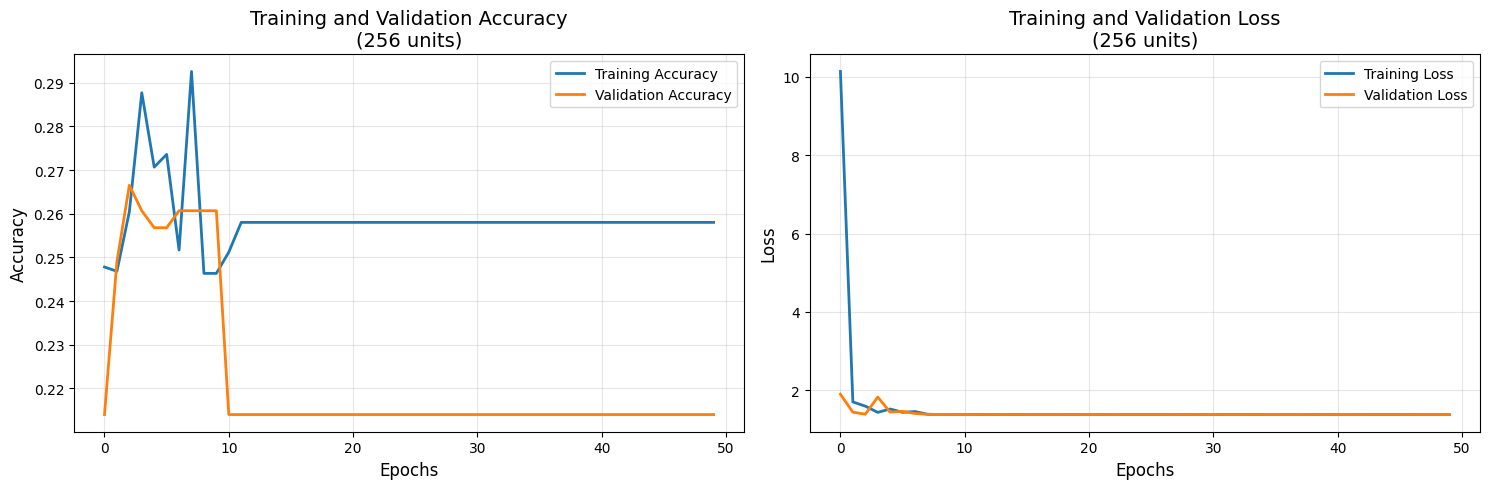

Acurácia validação: 0.2665

Melhor arquitetura: 128 unidades ocultas
Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.2500 - loss: 3.3877
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.2321 - loss: 1.5436
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.2621 - loss: 1.4413
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.2558 - loss: 1.4736
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.2590 - loss: 1.4190
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.2800 - loss: 1.4240
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.2593 - loss: 1.3943
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.2492 - loss: 1.3877
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.2492 - loss: 1.3870
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.2492 - loss: 1.3866
Epoch 11/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.24

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,975,374 (72.39 MB)

 Trainable params: 6,325,124 (24.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,650,250 (48.26 MB)

In [6]:
# ================== USO PRÁTICO ==================
def main():
    # 1. Carregar imagens da pasta
    dataset_folder = "pasta de teste"  # ← ALTERE AQUI
    # Estrutura esperada:
    # pasta/
    #   ├── classe1/
    #   │   ├── img1.jpg
    #   │   └── img2.jpg
    #   ├── classe2/
    #   │   ├── img1.jpg
    #   │   └── img2.jpg
    #   └── classe3/
    
    print("Carregando imagens...")
    X, y, class_names = load_images_from_folder(dataset_folder)
    print(f"Carregadas {len(X)} imagens de {len(class_names)} classes")
    print("Classes:", class_names)

    # 2. Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 3. Encontrar melhor arquitetura (similar ao seu código original)
    best_accuracy = 0
    best_units = 0
    
    for hidden_units in [32, 64, 128, 256]:  # Testa diferentes tamanhos
        print(f"\nTestando com {hidden_units} unidades ocultas...")
        
        model = create_image_mlp(X_train[0].shape, len(class_names), hidden_units)
        
        # Treinar
        history = model.fit(X_train, y_train,
                          epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_split=0.2,
                          verbose=0)
        
        # Plotar gráfico para esta arquitetura
        plot_training_history(history, hidden_units)
        
        # Avaliar
        val_accuracy = max(history.history['val_accuracy'])
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_units = hidden_units
            
        print(f"Acurácia validação: {val_accuracy:.4f}")

    # 4. Treinar modelo final com melhor arquitetura
    print(f"\nMelhor arquitetura: {best_units} unidades ocultas")
    final_model = create_image_mlp(X_train[0].shape, len(class_names), best_units)
    
    final_model.fit(X_train, y_train,
                   epochs=EPOCHS*2,  # Treina por mais tempo
                   batch_size=BATCH_SIZE,
                   verbose=1)

    # 5. Avaliar no teste
    test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
    print(f"\nAcurácia final no teste: {test_acc:.4f}")

    # 6. Salvar modelo para uso futuro
    # final_model.save('meu_classificador_imagens.h5')
    # print("Modelo salvo como 'meu_classificador_imagens.h5'")
    final_model.summary()

    # 7. Exemplo de como classificar uma nova imagem
    def predict_new_image(image_path):
        img = Image.open(image_path).convert('RGB')
        img = img.resize(IMAGE_SIZE)
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Adicionar dimensão batch
        
        prediction = final_model.predict(img_array)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)
        
        return class_names[predicted_class], confidence

    # Exemplo de uso:
    # classe, confianca = predict_new_image("nova_imagem.jpg")
    # print(f"Classificado como: {classe} (confiança: {confianca:.2f})")

if __name__ == "__main__":
    main()